In [1]:
# Required Packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import pandas_datareader.data as pdr
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Table of contentens
* [# The Market Analysis for Technology Services Sector](#The-Market-Analysis-for-Technology-Services-Sector)
    * [Stock Prices Fluctuations](#Stock-Prices-Fluctuations)
    * [The Moving Average of the Stocks](#The-Moving-Average-of-the-Stocks)
    * [The Daily Return Average of a Stock](#The-Daily-Return-Average-of-a-Stock)
    * [The Correlation Between Daily Returns of Different Stocks](#The-Correlation-Between-Daily-Returns-of-Different-Stocks)
    * [Predicting Future Behaviors](#Predicting-Future-Behaviors)
        * [Apple Inc.](#Apple-Inc.)
        * [Microsoft Corporation](#Microsoft-Corporation)

# The Market Analysis for Technology Services Sector

In this article, the **Technology Services Sector data** from [Yahoo! Finance](https://finance.yahoo.com/) is used, and we analyze the current top tech companies' stock prices.

| Name | Symbol |
|----------------------------------------------------|--------|
| Apple Inc. | AAPL |
| Microsoft Corporation | MSFT |
| Alphabet Inc. | GOOG |
| Facebook, Inc. | FB |
| Taiwan Semiconductor Manufacturing Company Limited | TSM |
| Intel Corporation | INTC |

In [2]:
Tech_list = ['AAPL','MSFT','GOOG','FB','TSM','INTC']

The data is collected from **a year before** today **until now**.

In [3]:
start, end = [datetime(datetime.today().year-1,datetime.today().month,datetime.today().day), datetime.today()]

Collecting data from **Yahoo Finance!**

In [4]:
AAPL = pdr.DataReader('AAPL','yahoo',start,end)
MSFT = pdr.DataReader('MSFT','yahoo',start,end)
GOOG = pdr.DataReader('GOOG','yahoo',start,end)
FB = pdr.DataReader('FB','yahoo',start,end)
TSM = pdr.DataReader('TSM','yahoo',start,end)
INTC = pdr.DataReader('INTC','yahoo',start,end)

Consider **Apple Inc.** for example. We have,

In [5]:
AAPL.describe()

High         Low        Open       Close        Volume  \
count  250.000000  250.000000  250.000000  250.000000  2.500000e+02   
mean   194.019320  190.060920  191.999680  192.078560  3.202019e+07   
std     21.050389   20.918327   20.930724   20.961146  1.343458e+07   
min    145.720001  142.000000  143.979996  142.190002  1.136200e+07   
25%    175.902496  173.362499  174.737499  174.757500  2.225975e+07   
50%    198.750000  193.805000  196.364998  196.345001  2.865870e+07   
75%    209.089996  205.104996  207.449997  207.479996  3.854895e+07   
max    237.639999  232.309998  232.949997  236.210007  9.574460e+07   

        Adj Close  
count  250.000000  
mean   190.809474  
std     21.256216  
min    140.505798  
25%    173.279305  
50%    195.165611  
75%    206.476418  
max    236.210007

In [6]:
AAPL.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2018-10-15  221.830002  217.270004  221.160004  217.360001  30791000.0   
2018-10-16  222.990005  216.759995  218.929993  222.149994  29184000.0   
2018-10-17  222.639999  219.339996  222.300003  221.190002  22885400.0   
2018-10-18  219.740005  213.000000  217.860001  216.020004  32581300.0   
2018-10-19  221.259995  217.429993  218.059998  219.309998  33078700.0   

             Adj Close  
Date                    
2018-10-15  214.038605  
2018-10-16  218.755417  
2018-10-17  217.810089  
2018-10-18  212.719086  
2018-10-19  215.958801

----

## Stock Prices Fluctuations

Let's plot the stocks adjusted the closing price for all stock data under study.

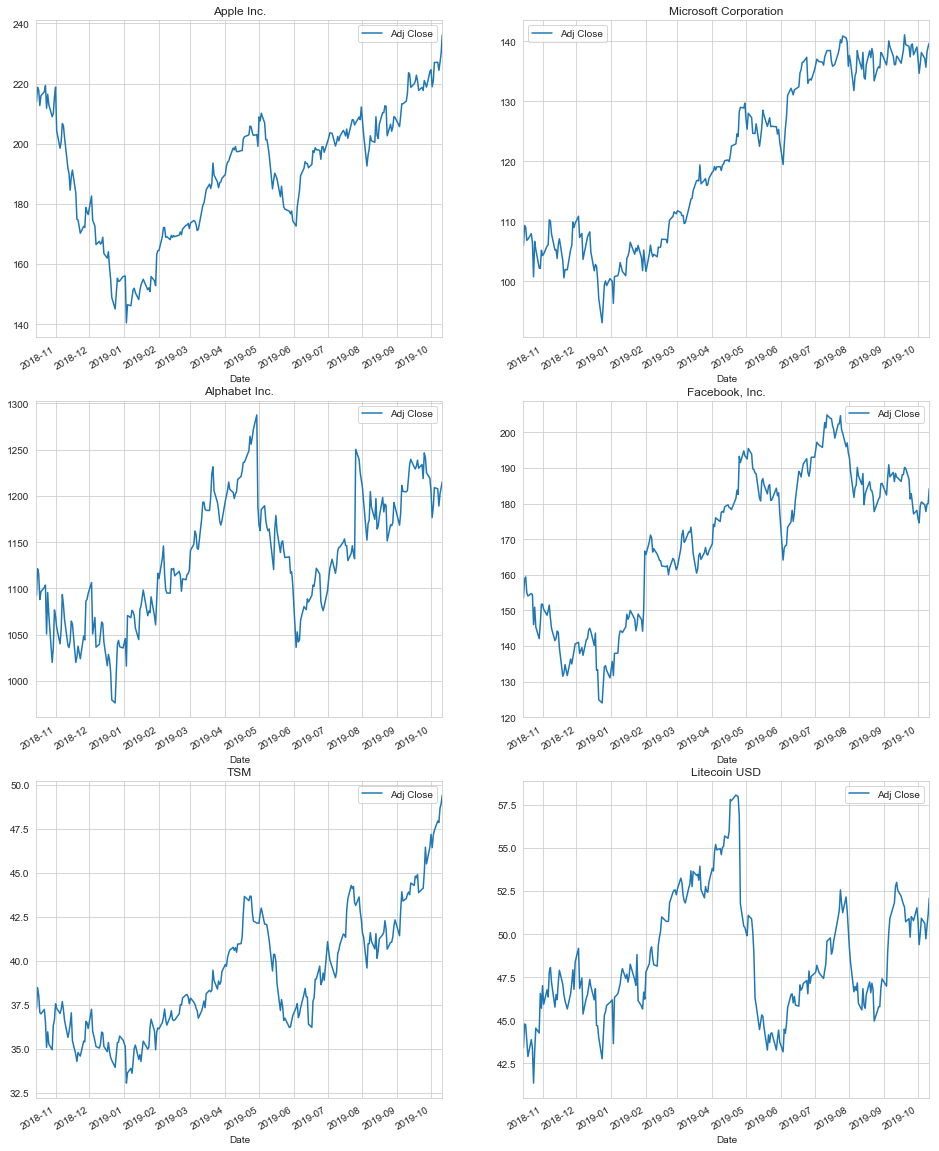

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))
# Apple Inc.
axes[0,0].set_title('Apple Inc.');
AAPL['Adj Close'].plot(ax=axes[0,0], legend = True)
# Microsoft Corporation
axes[0,1].set_title('Microsoft Corporation');
MSFT['Adj Close'].plot(ax=axes[0,1], legend = True)
# Alphabet Inc.
axes[1,0].set_title('Alphabet Inc.');
GOOG['Adj Close'].plot(ax=axes[1,0], legend = True)
# Facebook, Inc.
axes[1,1].set_title('Facebook, Inc.');
FB['Adj Close'].plot(ax=axes[1,1], legend = True)
# TSM
axes[2,0].set_title('TSM');
TSM['Adj Close'].plot(ax=axes[2,0], legend = True)
# Intel Corporation
axes[2,1].set_title('Litecoin USD');
INTC['Adj Close'].plot(ax=axes[2,1], legend = True)

Within the year, we can see the value of **GOOG** almost increases by 100, from 1125 to 1225.

Now, we can plot the total volume being traded over time.

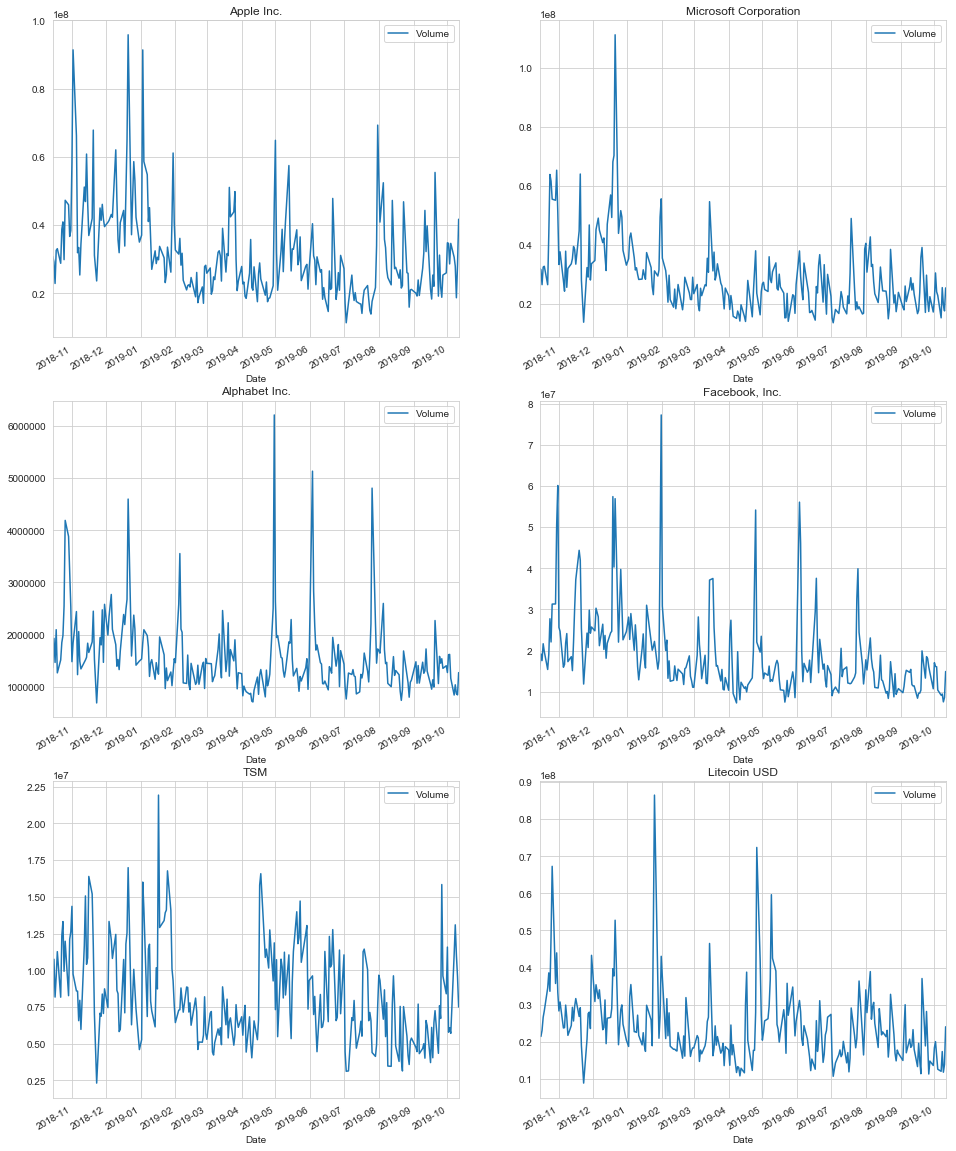

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))
# Apple Inc.
axes[0,0].set_title('Apple Inc.');
AAPL['Volume'].plot(ax=axes[0,0], legend = True)
# Microsoft Corporation
axes[0,1].set_title('Microsoft Corporation');
MSFT['Volume'].plot(ax=axes[0,1], legend = True)
# Alphabet Inc.
axes[1,0].set_title('Alphabet Inc.');
GOOG['Volume'].plot(ax=axes[1,0], legend = True)
# Facebook, Inc.
axes[1,1].set_title('Facebook, Inc.');
FB['Volume'].plot(ax=axes[1,1], legend = True)
# TSM
axes[2,0].set_title('TSM');
TSM['Volume'].plot(ax=axes[2,0], legend = True)
# Intel Corporation
axes[2,1].set_title('Litecoin USD');
INTC['Volume'].plot(ax=axes[2,1], legend = True)

It can be seen that **TSM** has had the most fluctuations during this period.

***

## The Moving Average of the Stocks

In particular here, we would like to create moving averages for **10**, **20** and **60** day periods of time.

In [9]:
MA_list = [10,20,60]
for ma in MA_list:
    column_name = "MA %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()
    MSFT[column_name] = MSFT['Adj Close'].rolling(window=ma,center=False).mean()
    GOOG[column_name] = GOOG['Adj Close'].rolling(window=ma,center=False).mean()
    FB[column_name] = FB['Adj Close'].rolling(window=ma,center=False).mean()
    TSM[column_name] = TSM['Adj Close'].rolling(window=ma,center=False).mean()
    INTC[column_name] = INTC['Adj Close'].rolling(window=ma,center=False).mean()

For example, for **AAPL**, this reads,

In [10]:
AAPL.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2019-10-07  229.929993  225.839996  226.270004  227.059998  30576500.0   
2019-10-08  228.059998  224.330002  225.820007  224.399994  27955000.0   
2019-10-09  227.789993  225.639999  227.029999  227.029999  18692600.0   
2019-10-10  230.440002  227.300003  227.929993  230.089996  28253400.0   
2019-10-11  237.639999  232.309998  232.949997  236.210007  41698900.0   

             Adj Close  MA 10 days  MA 20 days  MA 60 days  
Date                                                        
2019-10-07  227.059998     221.983  221.137000  211.082623  
2019-10-08  224.399994     222.655  221.521999  211.415402  
2019-10-09  227.029999     223.255  221.693999  211.803803  
2019-10-10  230.089996     224.275  222.043999  212.262298  
2019-10-11  236.210007     226.014  222.917000  212.784438

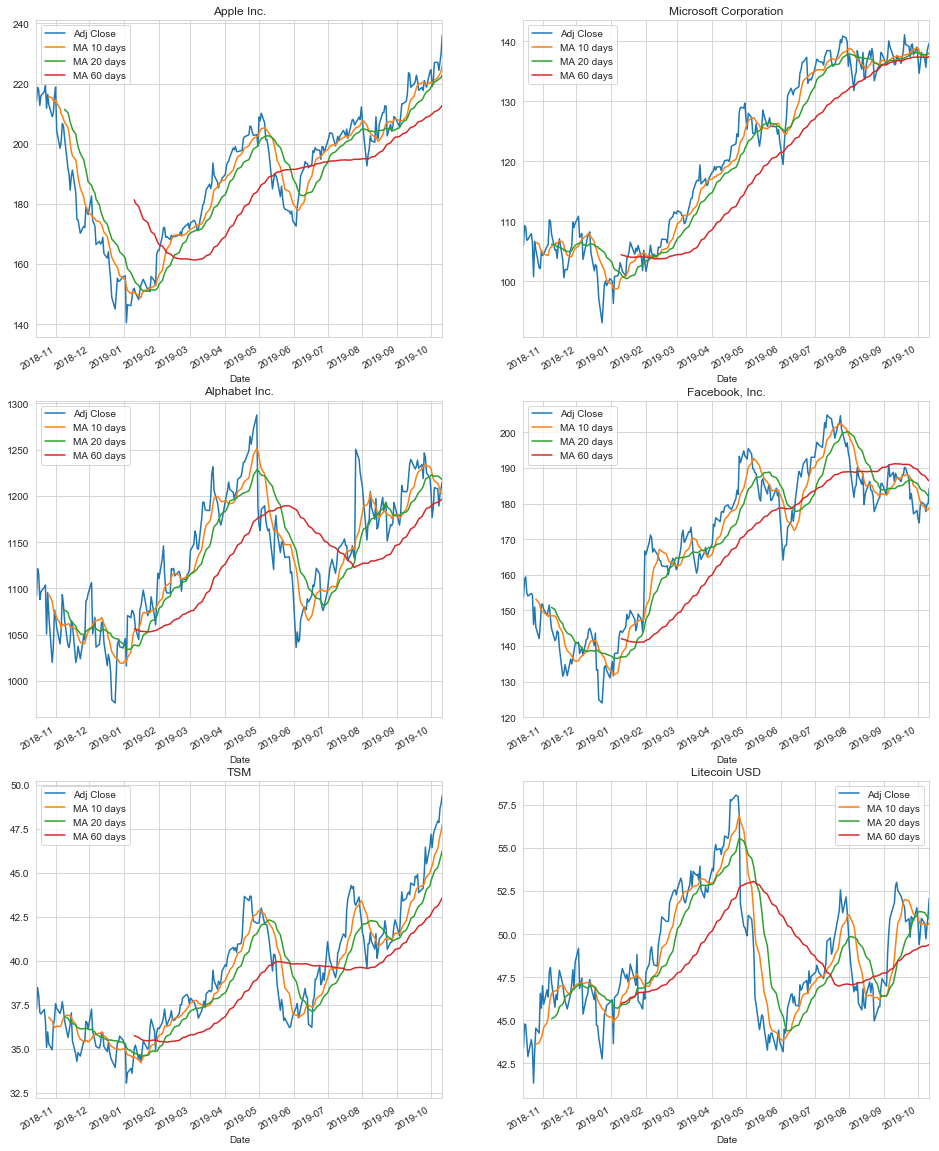

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))
# Apple Inc.
axes[0,0].set_title('Apple Inc.');
AAPL[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[0,0], legend = True)
# Microsoft Corporation
axes[0,1].set_title('Microsoft Corporation');
MSFT[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[0,1], legend = True)
# Alphabet Inc.
axes[1,0].set_title('Alphabet Inc.');
GOOG[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[1,0], legend = True)
# Facebook, Inc.
axes[1,1].set_title('Facebook, Inc.');
FB[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[1,1], legend = True)
# TSM
axes[2,0].set_title('TSM');
TSM[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[2,0], legend = True)
# Intel Corporation
axes[2,1].set_title('Litecoin USD');
INTC[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[2,1], legend = True)

Consider **MSFT**, it can be seen that it has been growing since the beginning of the period gradually.

***

## The Daily Return Average of a Stock

Daily return  can be calculated using the percentage change of the adjusted closing price.

In [12]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
FB['Daily Return'] = FB['Adj Close'].pct_change()
TSM['Daily Return'] = TSM['Adj Close'].pct_change()
INTC['Daily Return'] = INTC['Adj Close'].pct_change()

The daily retun plots

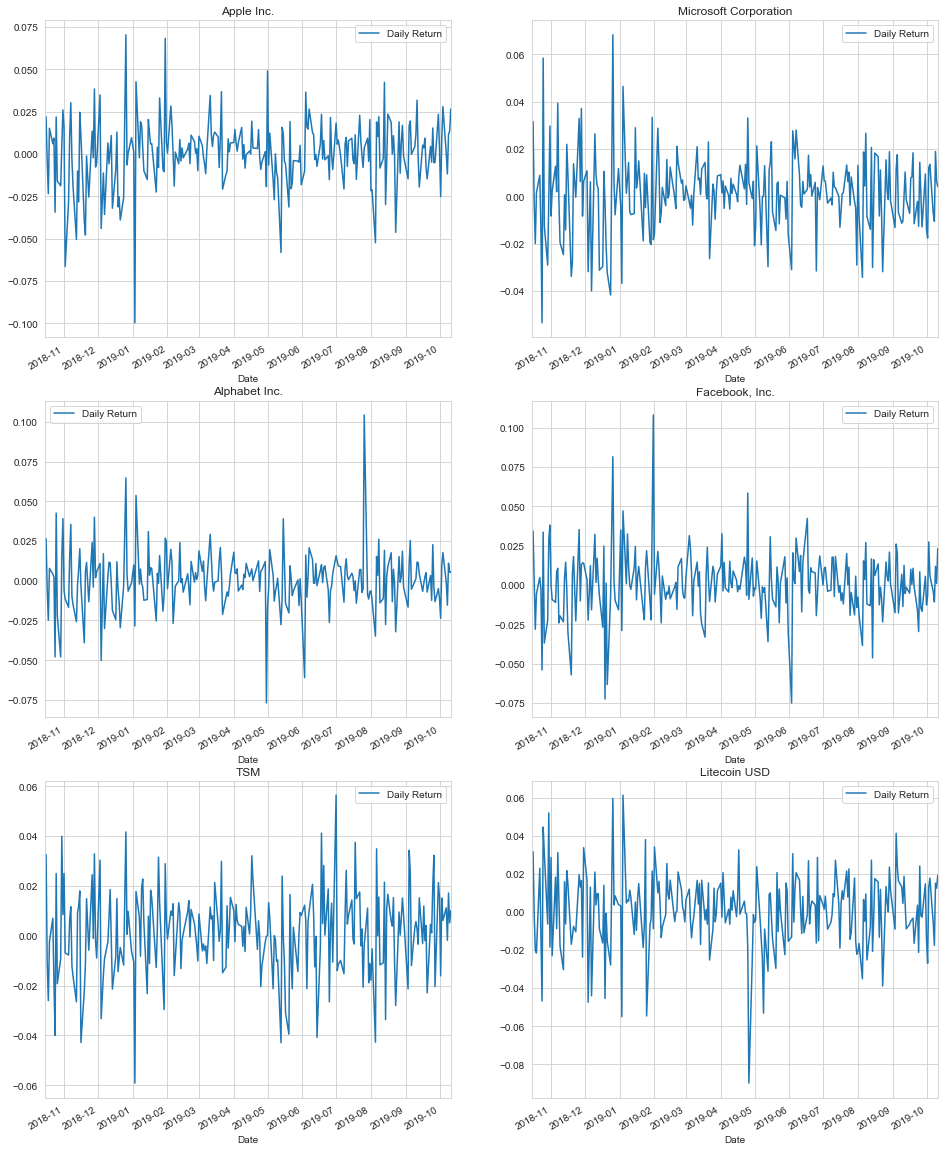

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))
# Apple Inc.
axes[0,0].set_title('Apple Inc.');
AAPL['Daily Return'].plot(ax=axes[0,0], legend = True)
# Microsoft Corporation
axes[0,1].set_title('Microsoft Corporation');
MSFT['Daily Return'].plot(ax=axes[0,1], legend = True)
# Alphabet Inc.
axes[1,0].set_title('Alphabet Inc.');
GOOG['Daily Return'].plot(ax=axes[1,0], legend = True)
# Facebook, Inc.
axes[1,1].set_title('Facebook, Inc.');
FB['Daily Return'].plot(ax=axes[1,1], legend = True)
# TSM
axes[2,0].set_title('TSM');
TSM['Daily Return'].plot(ax=axes[2,0], legend = True)
# Intel Corporation
axes[2,1].set_title('Litecoin USD');
INTC['Daily Return'].plot(ax=axes[2,1], legend = True)

The daily returns are neither dominantly positive nor negative. However, the overall trend for **Apple Inc.** is positive!

***

## The Correlation Between Daily Returns of Different Stocks

First, we need to create a new data frame by reading the **Adj Close** column from all stock data under study. We have,

In [14]:
All_data= pdr.DataReader(Tech_list,'yahoo',start,end)['Adj Close']

In [15]:
All_data.head()

Symbols           AAPL        MSFT         GOOG          FB        TSM  \
Date                                                                     
2018-10-15  214.038605  105.935349  1092.250000  153.520004  37.261433   
2018-10-16  218.755417  109.282745  1121.280029  158.779999  38.473026   
2018-10-17  217.810089  108.997238  1115.689941  159.419998  38.049931   
2018-10-18  212.719086  106.821426  1087.969971  154.919998  37.059498   
2018-10-19  215.958801  106.978958  1096.459961  154.050003  36.972954   

Symbols          INTC  
Date                   
2018-10-15  43.412018  
2018-10-16  44.786617  
2018-10-17  44.737877  
2018-10-18  43.840977  
2018-10-19  42.895329

In [16]:
All_data.tail()

Symbols           AAPL        MSFT         GOOG          FB        TSM  \
Date                                                                     
2019-10-07  227.059998  137.119995  1207.680054  179.679993  47.950001   
2019-10-08  224.399994  135.669998  1189.130005  177.750000  47.860001   
2019-10-09  227.029999  138.240005  1202.310059  179.850006  48.680000   
2019-10-10  230.089996  139.100006  1208.670044  180.029999  48.930000   
2019-10-11  236.210007  139.679993  1215.449951  184.190002  49.419998   

Symbols          INTC  
Date                   
2019-10-07  50.619999  
2019-10-08  49.730000  
2019-10-09  50.480000  
2019-10-10  51.110001  
2019-10-11  52.090000

The returns can be analyzed using the percentage change from the **adj Close**.

In [17]:
All_returns = All_data.pct_change()

In [18]:
All_returns.tail()

Symbols         AAPL      MSFT      GOOG        FB       TSM      INTC
Date                                                                  
2019-10-07  0.000220 -0.007240 -0.001092 -0.004267  0.011177 -0.005892
2019-10-08 -0.011715 -0.010575 -0.015360 -0.010741 -0.001877 -0.017582
2019-10-09  0.011720  0.018943  0.011084  0.011814  0.017133  0.015081
2019-10-10  0.013478  0.006221  0.005290  0.001001  0.005136  0.012480
2019-10-11  0.026598  0.004170  0.005609  0.023107  0.010014  0.019174

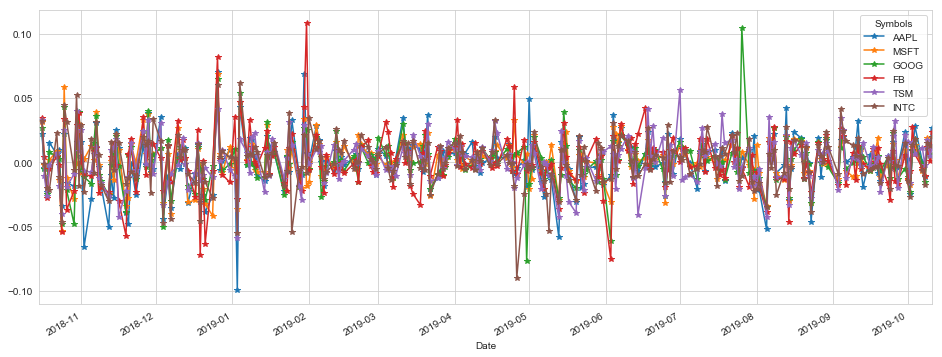

In [19]:
All_returns.plot(marker='*',legend=True,figsize=(16,6))

We can see that most high returns happen around the same time. However, it is needed to analyze this more carefully. Using a *joinplot*, we can investigate the correlation between different data. For example, we can plot a joinplot for **Apple Inc.** and **Microsoft Corporation**, and **Apple Inc.** and **Alphabet Inc.**;

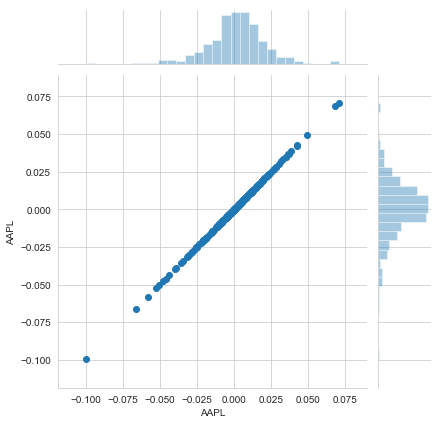

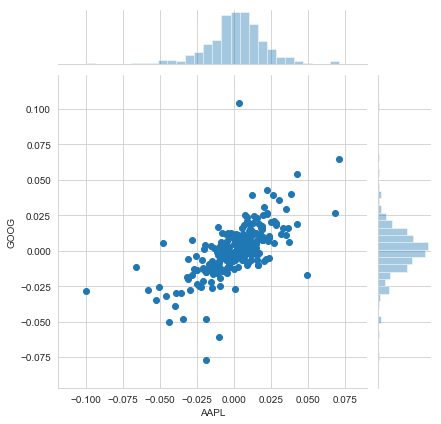

In [20]:
# Apple Inc. and Microsoft Corporation
sns.jointplot('AAPL','AAPL', All_returns, kind='scatter')
# Apple Inc. and Alphabet Inc.
sns.jointplot('AAPL','GOOG', All_returns, kind='scatter')

There seems to be a minor positive correlation between every two pairs. In particular, the return for **Apple Inc.** and **Microsoft Corporation** are highly correlated.

Now, we can use the pairplot tool to visualize all.

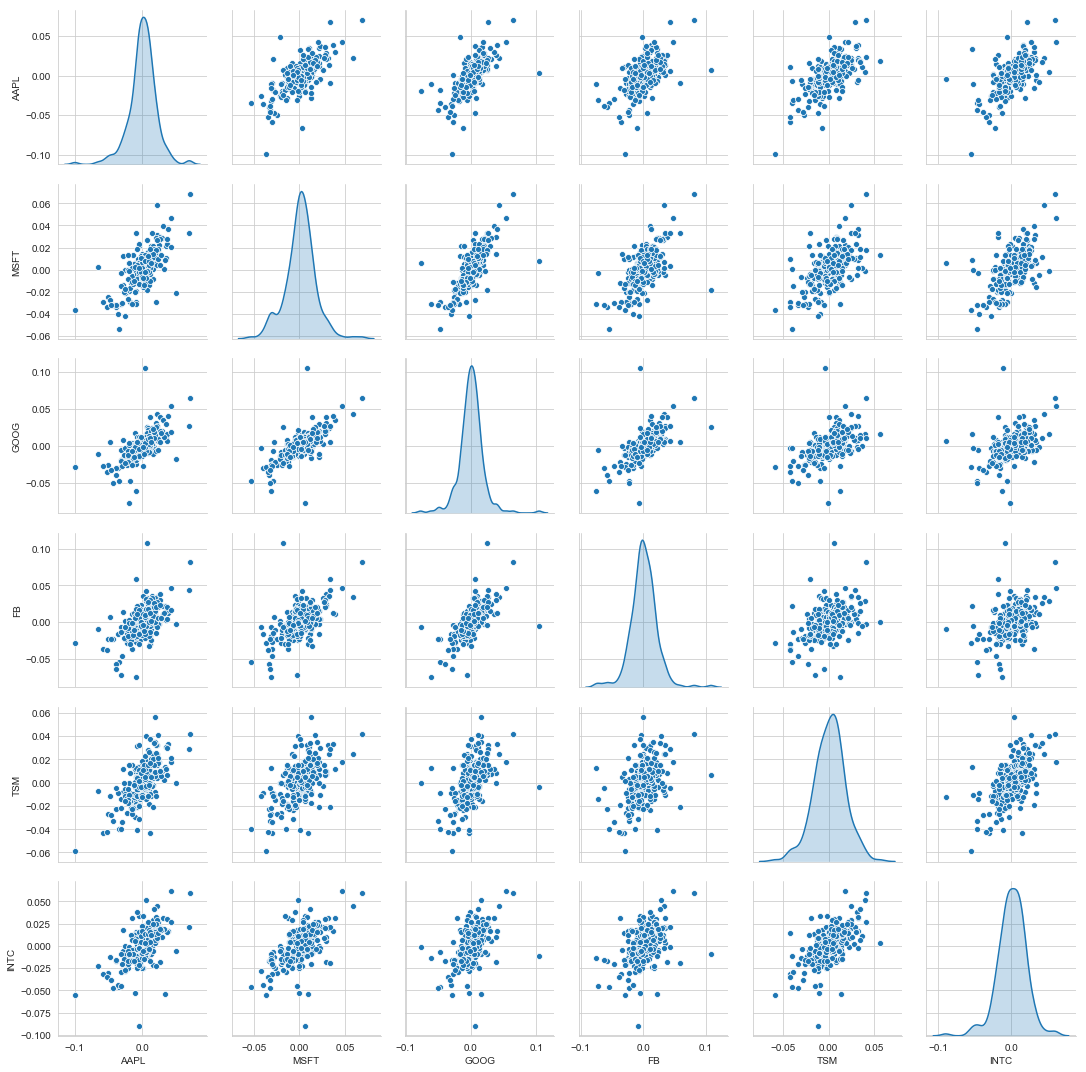

In [21]:
# Remove missing values
All_returns=All_returns.dropna()
# plot
sns.pairplot(All_returns,diag_kind='kde')

Nonetheless, the correlation matrix and plot are always convenient to see numerical values for correlations.

In [22]:
# Correlation Matrix
Cor_matrix = All_returns.corr()
Cor_matrix

Symbols      AAPL      MSFT      GOOG        FB       TSM      INTC
Symbols                                                            
AAPL     1.000000  0.698343  0.639317  0.552771  0.651407  0.605641
MSFT     0.698343  1.000000  0.720586  0.602566  0.565318  0.596236
GOOG     0.639317  0.720586  1.000000  0.663284  0.493896  0.475606
FB       0.552771  0.602566  0.663284  1.000000  0.424493  0.440095
TSM      0.651407  0.565318  0.493896  0.424493  1.000000  0.602051
INTC     0.605641  0.596236  0.475606  0.440095  0.602051  1.000000

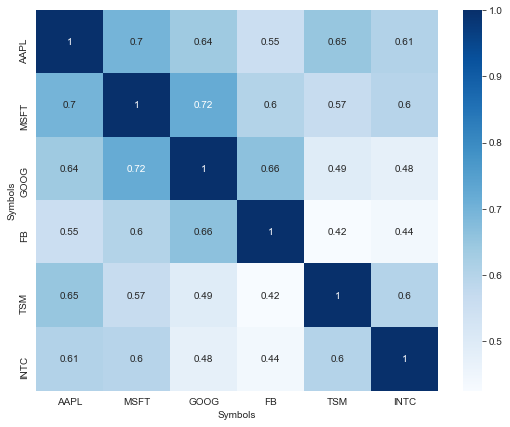

In [23]:
plt.figure(figsize = (9,7))
ax=sns.heatmap(Cor_matrix, xticklabels=Cor_matrix.columns, yticklabels=Cor_matrix.columns, annot=True, cmap="Blues")

Here, darker shades of blue represent a higher correlation.

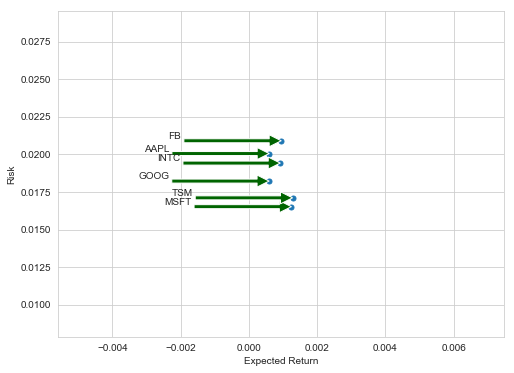

In [24]:
data=All_returns
plt.figure(figsize=(8,6))
plt.scatter(data.mean(),data.std(),s=25)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# adding annotatios
for label,x,y in zip(data.columns,data.mean(),data.std()):
    plt.annotate(label, xy=(x,y),xytext=(-100,0), textcoords = 'offset points', ha = 'right', va = 'bottom',
                 arrowprops=dict(facecolor='DarkGreen', shrink=0.001))

The current trend for cryptocurrencies seems to output a value between 0 and 0.002. We would like to identify a crypto with high return and low risk!

In [25]:
qt = All_returns['AAPL'].quantile(0.05)

In [26]:
qt_pct = abs(All_returns['AAPL'].quantile(0.05))*100
print(qt_pct)

3.1706554147198696


In [27]:
print("""The 0.05 empirical quantile of daily returns is at {0:.2f}.
      This means that with 95% confidence, the worst daily loss will not exceed {0:.2f}% (of the investment)."""
      .format(qt,qt_pct))

The 0.05 empirical quantile of daily returns is at -0.03.
      This means that with 95% confidence, the worst daily loss will not exceed -0.03% (of the investment).


## Predicting Future Behaviors

To predict future behaviors, we can implement the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) (also see this [link](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-mathematical-foundations/variance-and-standard-deviation) and this [link](https://www.investopedia.com/terms/m/montecarlosimulation.asp)).

Now conisder **Bitcoin USD**. We have,

In [28]:
# consider a year
days = 365
# Delta t
dt = 1/365
# mean
mu = All_returns.mean()['AAPL']
# standard deviation
sigma = All_returns.std()['AAPL']

Defining a Monte Carlo function fo the Stock price.

In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
    '''Function takes in stock price, number of days to run, mean and standard deviation values'''
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

### Apple Inc.

Note that,

In [30]:
AAPL.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2019-10-07  229.929993  225.839996  226.270004  227.059998  30576500.0   
2019-10-08  228.059998  224.330002  225.820007  224.399994  27955000.0   
2019-10-09  227.789993  225.639999  227.029999  227.029999  18692600.0   
2019-10-10  230.440002  227.300003  227.929993  230.089996  28253400.0   
2019-10-11  237.639999  232.309998  232.949997  236.210007  41698900.0   

             Adj Close  MA 10 days  MA 20 days  MA 60 days  Daily Return  
Date                                                                      
2019-10-07  227.059998     221.983  221.137000  211.082623      0.000220  
2019-10-08  224.399994     222.655  221.521999  211.415402     -0.011715  
2019-10-09  227.029999     223.255  221.693999  211.803803      0.011720  
2019-10-10  230.089996     224.275  222.043999  212.262298      0.013478  
2019-10-11  236.210007     226.014  222.917000  212.784438      0.026598

Text(0.5,1,'Monte Carlo Analysis for Apple Inc.')

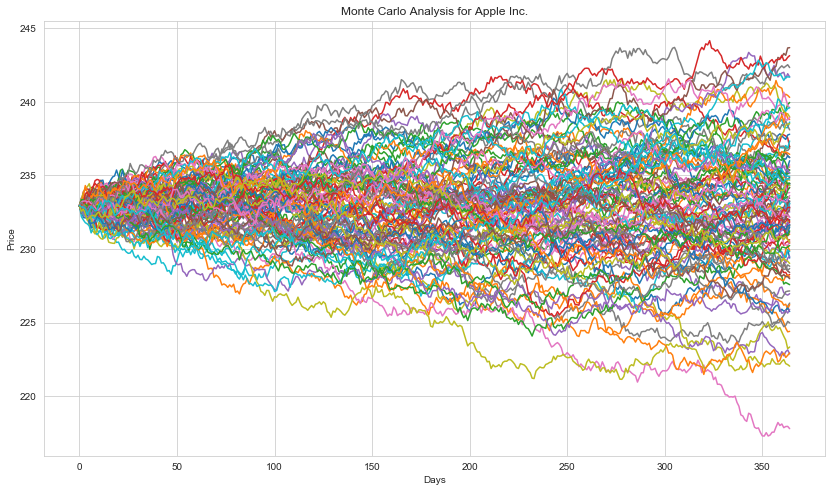

In [31]:
start_price = AAPL['Open'][-1]

fig = plt.figure(figsize = (14, 8))
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Apple Inc.')

In [32]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Apple Inc. after 365 days')

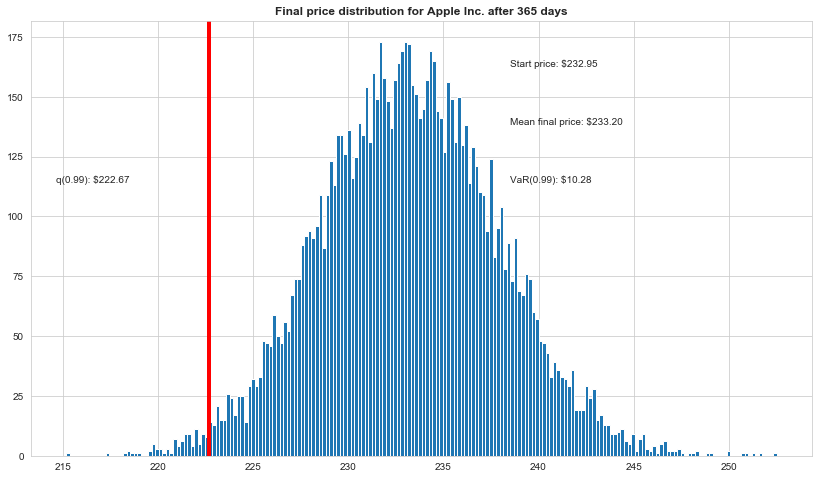

In [33]:
fig = plt.figure(figsize = (14, 8))
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)
plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Apple Inc. after %s days" %days, weight='bold')

Seems like Apple's overall price is increasing!

### Microsoft Corporation

Note that,

In [34]:
MSFT.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2019-10-07  138.179993  137.020004  137.139999  137.119995  15303700.0   
2019-10-08  137.759995  135.619995  137.080002  135.669998  25550500.0   
2019-10-09  138.699997  136.970001  137.460007  138.240005  19749900.0   
2019-10-10  139.669998  138.250000  138.490005  139.100006  17654600.0   
2019-10-11  141.029999  139.500000  140.119995  139.679993  25446000.0   

             Adj Close  MA 10 days  MA 20 days  MA 60 days  Daily Return  
Date                                                                      
2019-10-07  137.119995  137.627998  137.760500  137.311337     -0.007240  
2019-10-08  135.669998  137.456998  137.740000  137.265187     -0.010575  
2019-10-09  138.240005  137.344998  137.846001  137.292103      0.018943  
2019-10-10  139.100006  137.300999  137.925001  137.346808      0.006221  
2019-10-11  139.679993  137.495999  138.043000  137.408687      0.004170

Text(0.5,1,'Monte Carlo Analysis for Microsoft Corporation')

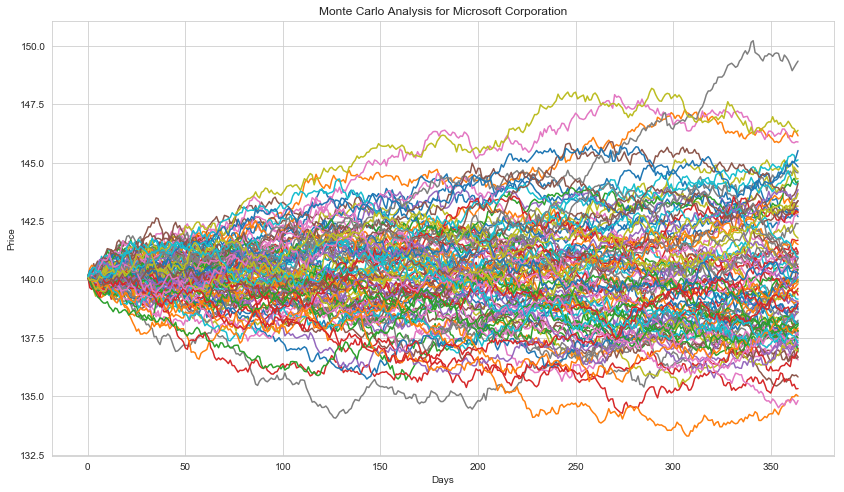

In [35]:
start_price = MSFT['Open'][-1]

fig = plt.figure(figsize = (14, 8))
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Microsoft Corporation')

In [36]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Microsoft Corporation after 365 days')

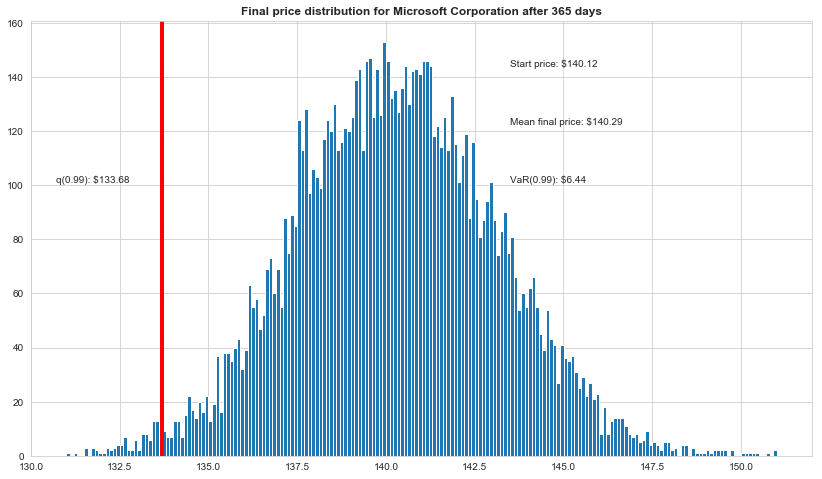

In [37]:
fig = plt.figure(figsize = (14, 8))
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)
plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Microsoft Corporation after %s days" %days, weight='bold')

Seems like Microsoft's overall price is increasing!